## Sea surface temperatures (SST) analysis
These scripts represent my learning of how to intepret and plot climate data. My ultimate goal is to identify the anthropogenic forcing (detection and attribution) of global SSTs. 
### Climatology
The climatology represents the weather conditions averaged over a period of time. Usually, this period is about 30 years, though it can differ pending on the application of the problem. 

In [2]:
# imports
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from datetime import timedelta
import os
import tempfile
import seaborn as sns
from scipy import stats

In [4]:
filepath_sst_noaa = '/Users/cmor7802/repos/climpyplots/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
ds_sst_noaa = xr.open_dataset(filepath_sst_noaa)
ds_sst_noaa

<xarray.Dataset>
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 0.0
Data variables:
    anom     (time, z, lat, lon) float32 ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

<xarray.DataArray 'time' (month: 12)>
array(['1951-01-01T06:32:43.636363520', '1951-02-01T06:32:43.636363520',
       '1951-03-01T12:25:10.489510400', '1951-04-01T12:25:10.489510400',
       '1951-05-01T12:25:10.489510400', '1951-06-01T12:25:10.489510400',
       '1951-07-01T12:25:10.489510400', '1951-08-01T12:25:10.489510400',
       '1951-09-01T12:25:10.489510400', '1951-10-01T12:25:10.489510400',
       '1951-11-01T12:25:10.489510400', '1951-12-01T12:25:10.489510400'],
      dtype='datetime64[ns]')
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:              reference time of global temperature anomalies
    standard_name:          time
    coverage_content_type:  coordinate
    axis:                   T


Text(0.5, 1.0, 'SST anomaly using CESM model')

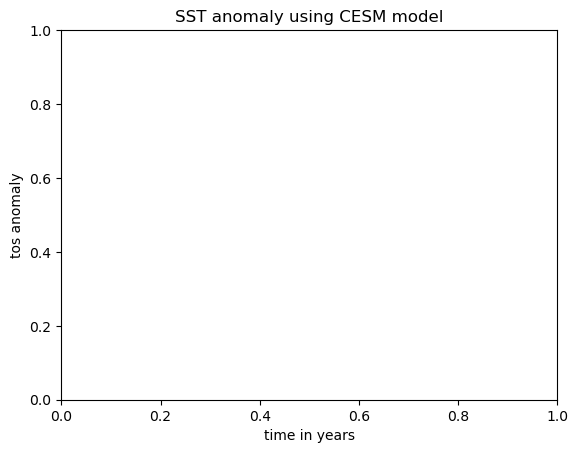

In [12]:
# This code computes the means over various timeseries, which we use later to calculate the climatologu

# Step 1: Calculate the climatology (mean of the sst for the entire period (1880-2022) averaged per month)
sst_clim = ds_sst_noaa.time.groupby("time.month").mean()
print(sst_clim)

# Step 2: group the data by time and month
sst = ds_sst_noaa.time.groupby("time.month")

# Step 3: Calculate the anomaly, by subtracting the data grouped by day and month from the climatology
sst_anom = sst_clim - sst
# sst_anom.sel(lon=72, lat=32, method="nearest").plot()
plt.ylabel("tos anomaly")
plt.ylabel("tos anomaly")
plt.xlabel("time in years")
plt.title("SST anomaly using CESM model")